In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
sns.set(style='darkgrid')

In [59]:
df = pd.read_csv("healthcare appointment data.csv")
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [60]:
#Finding out any missed or null values in the dataset
df.isnull().values.any()

False

In [61]:
# to find each column has atleast 2 different values so we can predict the output
print(df.DayOfTheWeek.nunique(dropna = True))
print(df.Gender.nunique(dropna = True))
print(df.Status.nunique(dropna = True))
print(df.Diabetes.nunique(dropna = True))
print(df.Alcoolism.nunique(dropna = True)) 
print(df.HiperTension.nunique(dropna = True))
print(df.Handcap.nunique(dropna = True))
print(df.Smokes.nunique(dropna = True))
print(df.Scholarship.nunique(dropna = True))
print(df.Tuberculosis.nunique(dropna = True)) 
print(df.Sms_Reminder.nunique(dropna = True))
print(df.AwaitingTime.nunique(dropna = True)) 

7
2
2
2
2
2
5
2
2
2
3
213


In [62]:
# There are some typos in the column names like alcoholism, HyperTension, so renaming them.
df.rename(columns={'Alcoolism': 'Alcoholism', 'HiperTension': 'HyperTension','ApointmentData':'ApointmentDate'}, inplace=True)
df.head()

,Age,Gender,AppointmentRegistration,ApointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [63]:
# converting AppointmentRegistration and AppointmentDate into proper datetime formats and converting Awaiting time values into postive numbers
df['AppointmentRegistration'] = pd.to_datetime(df['AppointmentRegistration'])
df['ApointmentDate'] = pd.to_datetime(df['ApointmentDate'])
df.AwaitingTime = df.AwaitingTime.abs() 
df.head()

,Age,Gender,AppointmentRegistration,ApointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29
1,24,F,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1
2,4,F,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1
3,5,M,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,Thursday,Show-Up,0,0,0,0,0,0,0,1,15
4,38,M,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6


In [64]:
# creating a new column HourOfTheDay indicating the hour of the day at which the appointment was booked
df['HourOfTheDay'] = pd.to_datetime(df['AppointmentRegistration']).dt.hour
df.head()

,Age,Gender,AppointmentRegistration,ApointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,HourOfTheDay
0,19,M,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,14
1,24,F,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,7
2,4,F,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,12
3,5,M,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,17
4,38,M,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6,15


count    300000.000000
mean         37.808017
std          22.809014
min          -2.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         113.000000
Name: Age, dtype: float64


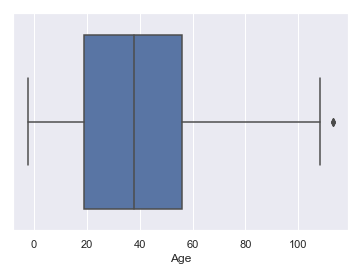

In [65]:
#Identify and remove outliers from Age
print(df.Age.describe())
sns.boxplot(x=df['Age'])

In [66]:
# the values that are exceeding 100 can be considered as outliers and graph is extended till negative values,
# expecting avg life expectancy as 90 and removing all higher values
# as they are outlier we are removing the rows with those entires
print(df.shape)
df = df.drop(df[(df.Age > 90) | (df.Age < 0)].index)
print(df.shape)

(300000, 16)
(299275, 16)


In [67]:
binary = {'Show-Up': 1,'No-Show': 0}
df["Status"]= [binary[item] for item in df["Status"]]
df.head()

,Age,Gender,AppointmentRegistration,ApointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,HourOfTheDay
0,19,M,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,Wednesday,1,0,0,0,0,0,0,0,0,29,14
1,24,F,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,Wednesday,1,0,0,0,0,0,0,0,0,1,7
2,4,F,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,Tuesday,1,0,0,0,0,0,0,0,0,1,12
3,5,M,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,Thursday,1,0,0,0,0,0,0,0,1,15,17
4,38,M,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,Tuesday,1,0,0,0,0,0,0,0,1,6,15


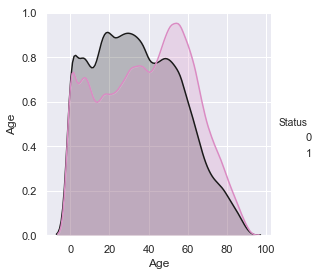

In [68]:
sns.pairplot(df, vars = ['Age'], diag_kind = 'kde', hue = 'Status', height = 4,palette=["K", "C6"]);

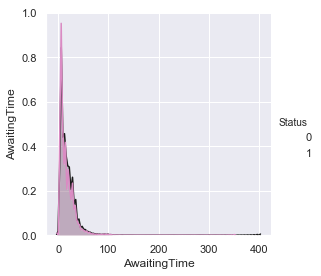

In [69]:
sns.pairplot(df, vars = ['AwaitingTime'], diag_kind = 'kde', hue = 'Status', height = 4,palette=["K", "C6"]);

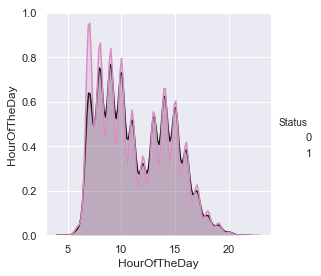

In [70]:
sns.pairplot(df, vars = ['HourOfTheDay'], diag_kind = 'kde', hue = 'Status', height = 4,palette=["K", "C6"]);

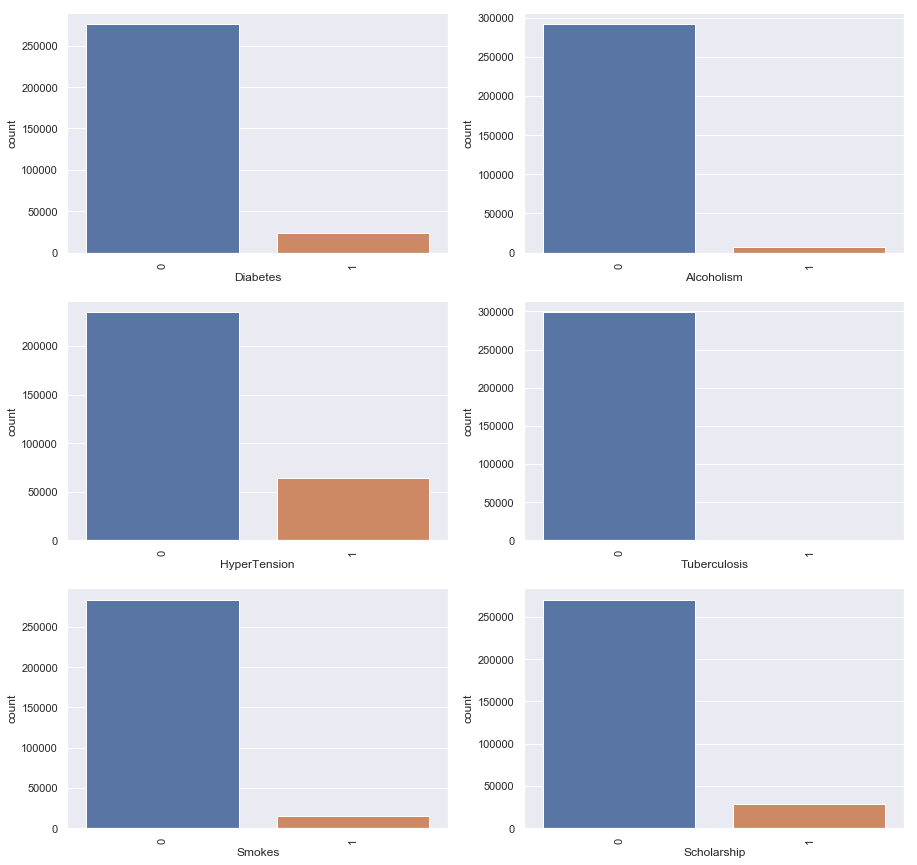

In [71]:
features=['Diabetes','Alcoholism', 'HyperTension','Tuberculosis','Smokes', 'Scholarship']
fig,ax=plt.subplots(3,2,figsize=(15,15))
for variable,subplot in zip(features,ax.flatten()):
    sns.countplot(df[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

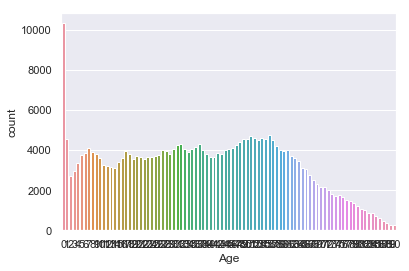

In [78]:
ax = sns.countplot(df['Age'],label="Count")   

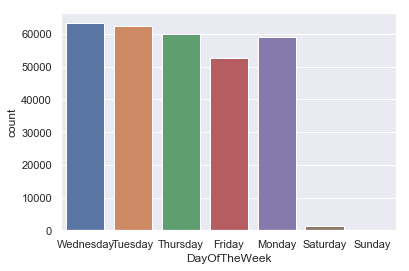

In [73]:
ax = sns.countplot(df['DayOfTheWeek'],label="Count") 

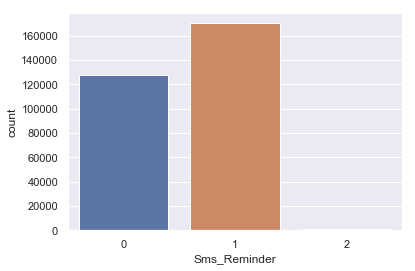

In [74]:
ax = sns.countplot(df['Sms_Reminder'],label="Count")

In [80]:
df.loc[1]

Age                                               24
Gender                                             F
AppointmentRegistration    2015-08-18 07:01:26+00:00
ApointmentDate             2015-08-19 00:00:00+00:00
DayOfTheWeek                               Wednesday
Status                                             1
Diabetes                                           0
Alcoholism                                         0
HyperTension                                       0
Handcap                                            0
Smokes                                             0
Scholarship                                        0
Tuberculosis                                       0
Sms_Reminder                                       0
AwaitingTime                                       1
HourOfTheDay                                       7
Name: 1, dtype: object

Paramters:
	Age
	Diabetes
	Alchoholism
	Hypertension
	Smokes
	Scholarship
	Tuberculosis

In [83]:
finalfeatures=['Age','Diabetes','Alcoholism','HyperTension','Smokes','Scholarship','Tuberculosis','Status']
newdf=df[finalfeatures]
newdf.head()

,Age,Diabetes,Alcoholism,HyperTension,Smokes,Scholarship,Tuberculosis,Status
0,19,0,0,0,0,0,0,1
1,24,0,0,0,0,0,0,1
2,4,0,0,0,0,0,0,1
3,5,0,0,0,0,0,0,1
4,38,0,0,0,0,0,0,1


In [84]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = newdf.drop(['Status'],axis=1)
# Putting response variable to y
y = newdf['Status']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [85]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (209492, 7)
Number transactions y_train dataset:  (209492,)
Number transactions X_test dataset:  (89783, 7)
Number transactions y_test dataset:  (89783,)


In [87]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [90]:
y_pred=model.predict(X_test)
Y_pred=pd.DataFrame(y_pred)
Y_pred.shape

(89783, 1)

In [93]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
print(metrics.confusion_matrix(y_test, Y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, Y_pred))
print("precision", metrics.precision_score(y_test,Y_pred))
print("recall", metrics.recall_score(y_test,Y_pred))
confusion=confusion_matrix(y_test,Y_pred)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

[[ 3880 23212]
 [ 6857 55834]] 

accuracy 0.6650925008075025
precision 0.7063482023125774
recall 0.8906222583783956
Sensitivity 0.8906222583783956
Positive Predection Rate 0.7063482023125774
Negative Predection rate 0.3613672347955667
False positive Predection Rate 0.8567842905654806
